## Homework 2 - Computational Chemistry
#### Cody R. Drisko

In [1]:
## Packages ##
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import sympy


## Conversions ##
bohr_to_m = 5.29177e-11
AU_mass_to_kg = 9.10938e-31
AU_angMom_to_Js = 1.054572e-34
J_to_kJmol = 6.022e23 / 1000
eV_to_J = 1 / 6.24e18


## Functions ##
def E_n (n, h_bar, m_e, L):
    return (n**2 * np.pi**2 * h_bar**2) / (2 * m_e * L**2)
def psi_n(n, N, x):
    return N * np.cos(np.pi * x / 2)
def phi_n(n, N, x):
    return N * (1 - x**2)
def percent_difference(value1, value2):
    return (np.abs(value1 - value2) / np.abs((value1 + value2) / 2)) * 100

___
### Question 1a

In [2]:
energy_Hartree = E_n(1, 1, 1, 2)
energy_kJmol = E_n(1, (1*AU_angMom_to_Js), (1*AU_mass_to_kg), (2*bohr_to_m)) * J_to_kJmol
energy_eV = E_n(1, (1*AU_angMom_to_Js/eV_to_J), (1*AU_mass_to_kg), (2*bohr_to_m)) * eV_to_J       
         
print("E_1 = %f Hartrees" %energy_Hartree)
print("E_1 = %f kJ/mol" %energy_kJmol)
print("E_1 = %f eV" %energy_eV)

E_1 = 1.233701 Hartrees
E_1 = 3239.009658 kJ/mol
E_1 = 33.562637 eV


___
### Question 1b

psi(-1) = 0
psi(1) = 0
The number of nodes = 0
The normalization constant = 1


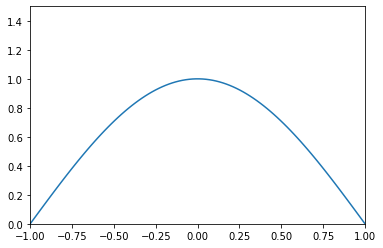

In [3]:
## Use SymPy to Get Normalization Constant ##
symX = sympy.Symbol("x")
norm1 = sympy.sqrt(1 / sympy.integrate((sympy.cos(sympy.pi * symX / 2)**2), (symX, -1, 1)))


## Set Psi_1 ##
x = np.linspace(-1, 1, 100)
psi_1 = np.zeros(100)

for i in range(0, 100):
    psi_1[i] = psi_n(1, norm1, x[i])

    
## Get Nodes ##    
nodes=0
for i in range(1, 99):                                              ## Don't include first and last points
    if (psi_1[i] == 0):
        ++nodes

        
## Get Proper Boundary Conditions ##
boundCond1 = psi_1[0]
boundCond2 = psi_1[99]


## Results ##
print("psi(-1) = %d" %boundCond1)
print("psi(1) = %d" %boundCond2)
print("The number of nodes = %d" %nodes)
print("The normalization constant = %d" %norm1)

plt.plot(x, psi_1)
plt.xlim(-1, 1)
_ = plt.ylim(0, 1.5)

___
### Question 1c

<E_1> = 1.25 Hartree

The percent difference between the expectation value of the energy and
the actual energy is 1.31%. This is small, telling us this function is a
decent approximation to the actual wavefunction. The actual value is lower 
than the approximation, which is predicted by the variational principle.


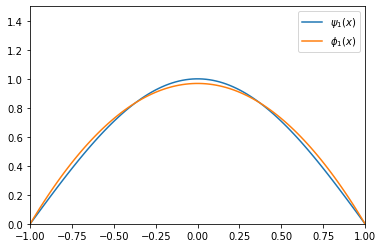

In [4]:
## Use SymPy to get Normalization Constant ##
symX = sympy.Symbol("x")
exprPhi = (1 - symX**2)
norm2 = sympy.sqrt(1 / sympy.integrate(exprPhi**2, (symX, -1, 1)))  ## normalization constant = sqrt(15)/4

if (sympy.integrate((sympy.sqrt(15)/4 * exprPhi)**2, (symX, -1, 1))) != 1:
    print("Not normalized")

## Expectation Value ##
braPhi = norm2 * exprPhi                                            ## <phi_1|
Ham_ketPhi = (-1/2) * sympy.diff(braPhi, symX, symX)                ## H|phi_1>
energy_Expect = sympy.integrate(braPhi * Ham_ketPhi, (symX, -1, 1))

percent_diff = percent_difference(energy_Expect, energy_Hartree)

print("<E_1> = %0.2f Hartree" %energy_Expect)
print("\nThe percent difference between the expectation value of the energy and\n\
the actual energy is %0.2f%%. This is small, telling us this function is a\n\
decent approximation to the actual wavefunction. The actual value is lower \n\
than the approximation, which is predicted by the variational principle." %percent_diff)
    
## Comparison Between Psi_1 and Phi_1 ##
x = np.linspace(-1, 1, 100)
psi_1 = np.zeros(100)
phi_1 = np.zeros(100)

for i in range(0, 100):
    psi_1[i] = psi_n(1, norm1, x[i])
    phi_1[i] = phi_n(1, norm2, x[i])
    
plt.plot(x, psi_1, label="$\\psi_1(x)$")
plt.plot(x, phi_1, label="$\\phi_1(x)$")

plt.xlim(-1, 1)
plt.ylim(0, 1.5)
_ = plt.legend()

___
### Question 2a

In [5]:
## Use SymPy to get Normalization Constant ##
r = sympy.Symbol("r")
xi = 1#sympy.Symbol("xi", positive = True)
gofr = sympy.exp(-xi * r**2)
N = sympy.sqrt(1 / sympy.integrate(gofr**2 * r**2, (r, 0, sympy.oo)))
gofr *= N   ## Normalized

def Hamiltonian_operator(r, waveFunction):
    return -1/2 * sympy.diff(waveFunction, r, r) - 1/r * waveFunction
function = gofr * r * Hamiltonian_operator(r, gofr * r)

float(sympy.integrate(function, (r, 0, sympy.oo)))

-0.09576912160573071

___
### Question 2b

0.2828282828282829

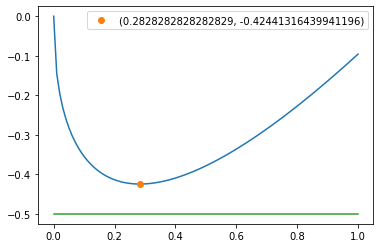

In [6]:
r = sympy.Symbol("r")
def Hamiltonian_operator(r, waveFunction):
    return -1/2 * sympy.diff(waveFunction, r, r) - 1/r * waveFunction

def this(r, xi):
    gofr = sympy.exp(-xi * r**2)
    N = sympy.sqrt(1 / sympy.integrate(gofr**2 * r**2, (r, 0, sympy.oo)))
    gofr *= N   ## Normalized
    function = gofr * r * Hamiltonian_operator(r, gofr * r)
    return float(sympy.integrate(function, (r, 0, sympy.oo)))

xi = np.linspace(0, 1, 100)
answer = np.zeros(100)
for i in range(0, 100):
    answer[i] = this(r, xi[i])

minimum = np.min(answer)
for i in range(0, 100):
    if answer[i] == minimum:
        bestAnswer = xi[i]
        
    
plt.plot(xi, answer)
plt.plot(bestAnswer, minimum, 'o', label="(" + str(bestAnswer) + ", " + str(minimum) + ")")
plt.plot(xi, np.linspace(-.5, -.5, 100))
plt.legend()

bestAnswer
